# PoS - Photosphere Modelling 

### Importing

In [2]:
%config InlineBackend.figure_format = 'retina'                                       # so you can see plots in HD =) 
import numpy as np
import scipy as sp
import scipy.interpolate
import matplotlib.pyplot as plt
import time
from mpl_toolkits.mplot3d import Axes3D

## 1 - The Opacity Project

/Users/toli/anaconda/lib/python3.6/site-packages/scipy/interpolate/fitpack.py:975: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=27,53 m=1254 fp=0.000666 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


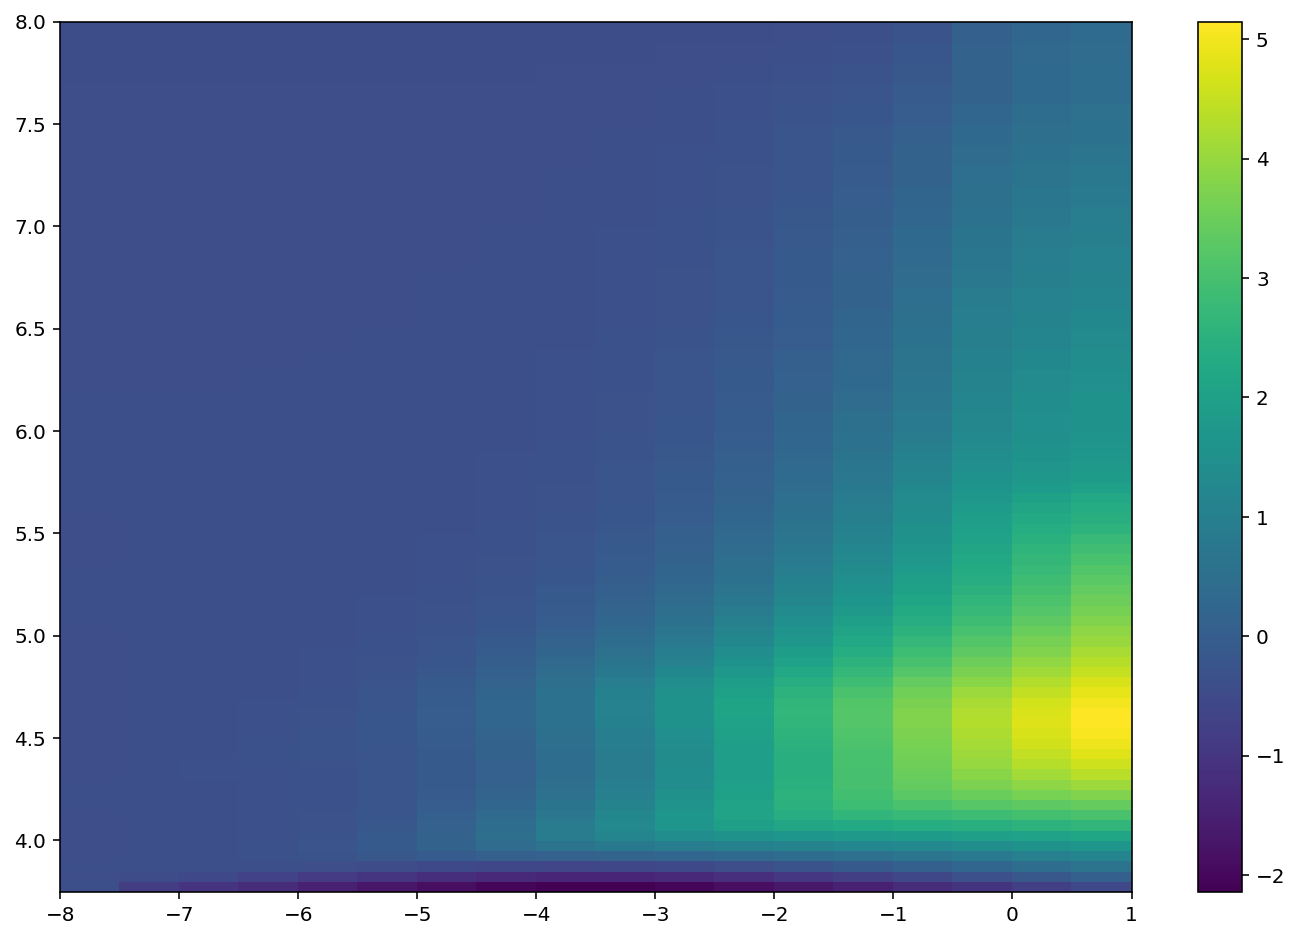

In [6]:
# First extract the data
X = np.loadtxt('untitled.txt', comments='#',)

# In order to have the first term as logR and the rest logT
Xtrans = np.transpose(X)

# To extract the two axis:
logT = Xtrans[0][1:-4]
logR = X[0][1:]

# To extract the mean opacities
cols = np.arange(1,20)
K = np.loadtxt('untitled.txt', comments='#',usecols=cols)
logk_raw = K[1:-4].flatten()
logk_r_values = []
# We also need to get rid of the non-physical values:
#for i in logk_raw:
  #  if i < 9.99:
#logk_r_values.append(i)
#logk_r_values = np.array(logk_r_values)

# Now to interpolate the values and make logk_r(logR,logT):
R, T = np.meshgrid(logR,logT)
logk_r_func = sp.interpolate.interp2d(R,T,logk_raw,kind='linear')
#logk_r = sp.interpolate.griddata(loglogT,logk_r_values,method='linear')


Z = logk_r_func(logR,logT)

plt.figure(figsize=(12,8))
plt.subplot(111)
plt.pcolormesh(R,T,Z)
plt.colorbar()
plt.show()



Now to recreate the results in 3.17 of LeBlanc: **DO THIS CONSISTENTLY!!!!**

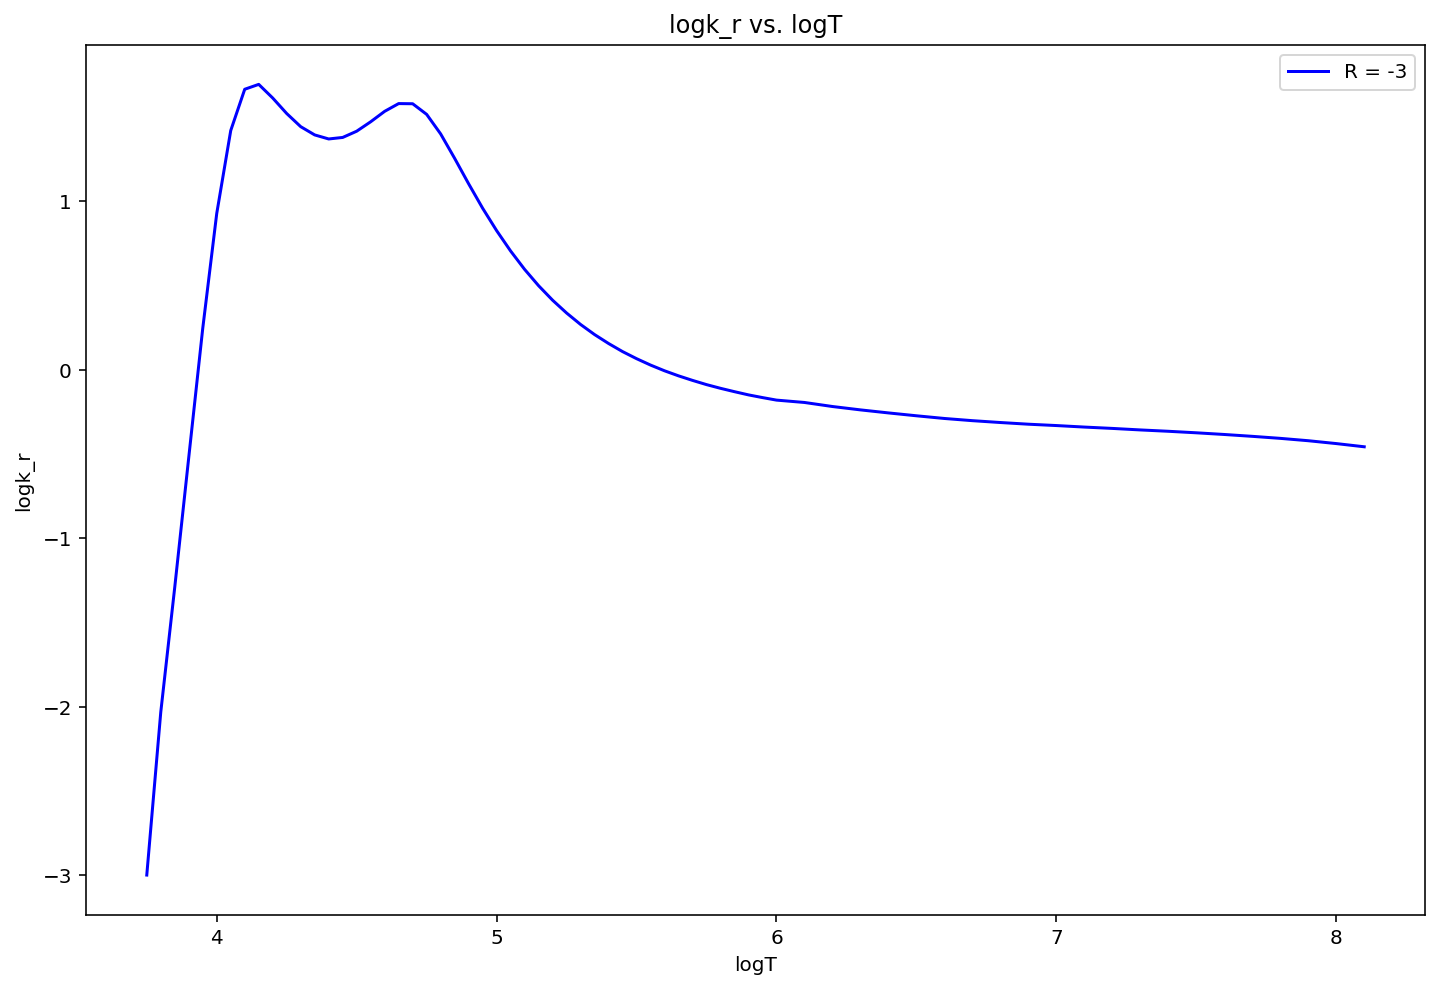

In [14]:

# But we only need to extract the logR=-3 to get the values of logk_r:
logRneg3 = Xtrans[11][:]
# There are some values that do not exist
limit = 9.999

# to append the values of logk_r and get rid of the first value which is logR = -3
logk_r3 = []
for i in logRneg3:
    if i < limit:
        logk_r3.append(i)        
tab_logk_r3 = np.array(logk_r3)                                                             # represents y axis                                   

logT3 = Xtrans[0][1:68]                                                            # extracting x axis

# Now in order to interpolate the values of kr:
logk_r_logT = sp.interpolate.interp1d(logT,logk_r)


    
#Now plotting kr as a function of T:
plt.figure(figsize=(12,8))
plt.subplot(111)
plt.plot(logT,logk_r_logT(logT),c='blue',label='R = -3')
plt.xlabel('logT')
plt.ylabel('logk_r')
plt.title('logk_r vs. logT')
plt.legend()
plt.show()

In [231]:
print(len(T.flatten()))

1254


Now to find $logk_r$ vs. T 

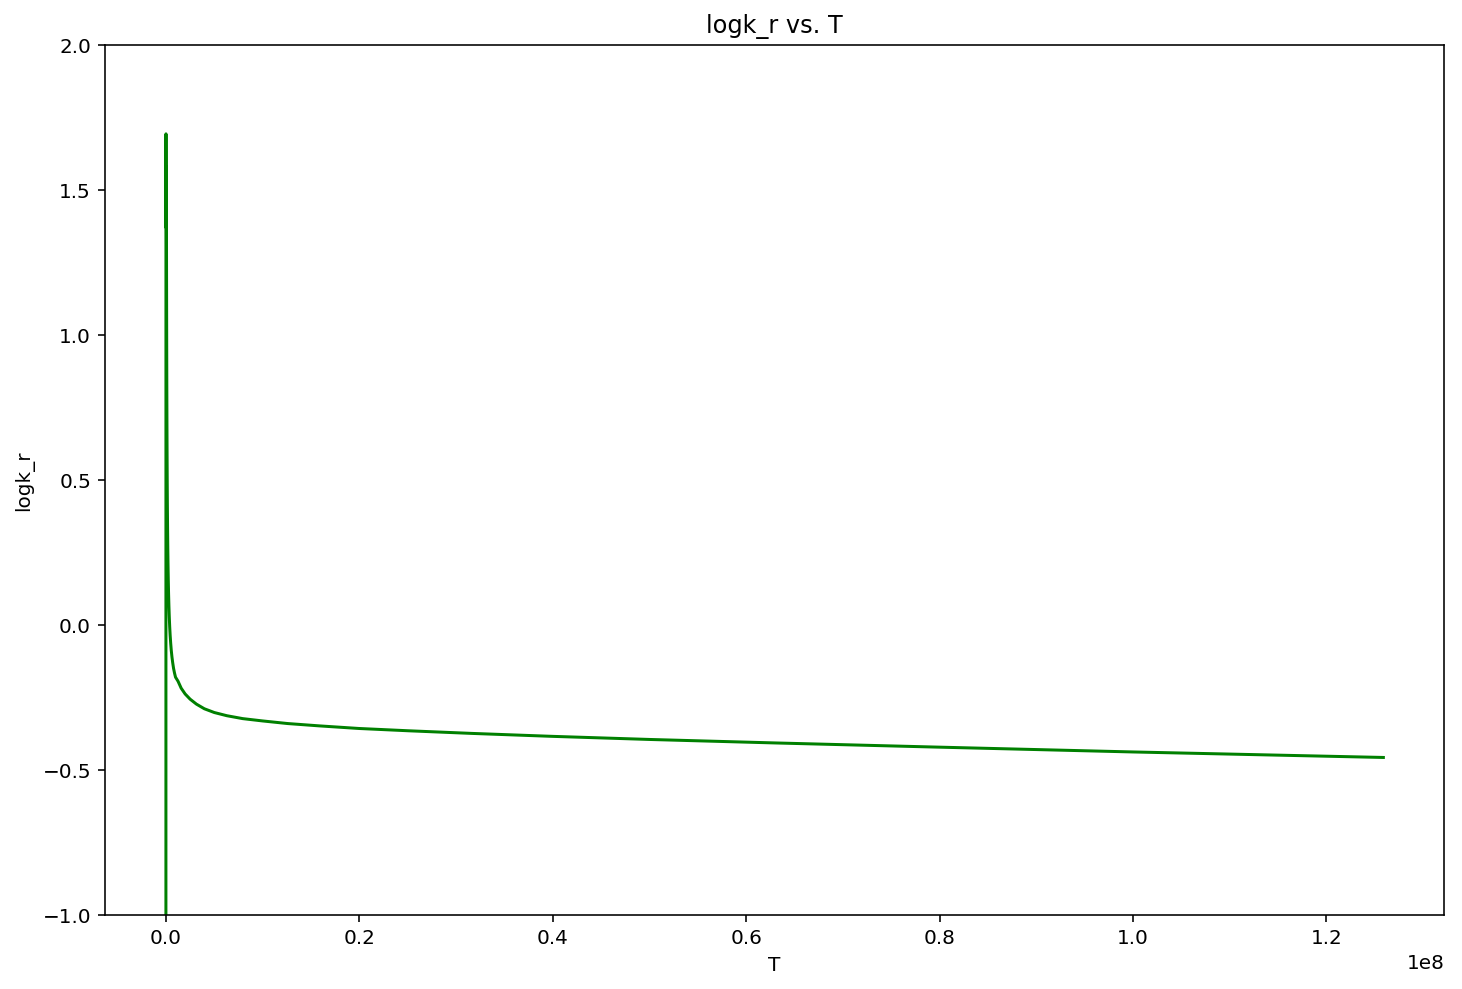

In [4]:
T = np.power(10,logT)
logk_r_T = sp.interpolate.interp1d(T,logk_r)

plt.figure(figsize=(12,8))
plt.subplot(111)
plt.plot(T,logk_r_T(T),c='g')
plt.xlabel('T')
plt.ylabel('logk_r')
plt.title('logk_r vs. T')
#plt.xlim([0.011e8,1e8])
plt.ylim([-1,2])
plt.show()

Plotting logk_r as a function of logP:

$logP = log\rho - logm + logk +logT$ where m corresponds to $m_H = 1.67e-24 g $ since X = 1  

Since $log\rho = 3logT + 15$:

$logP = 2logT - logm_H + logk + 15$

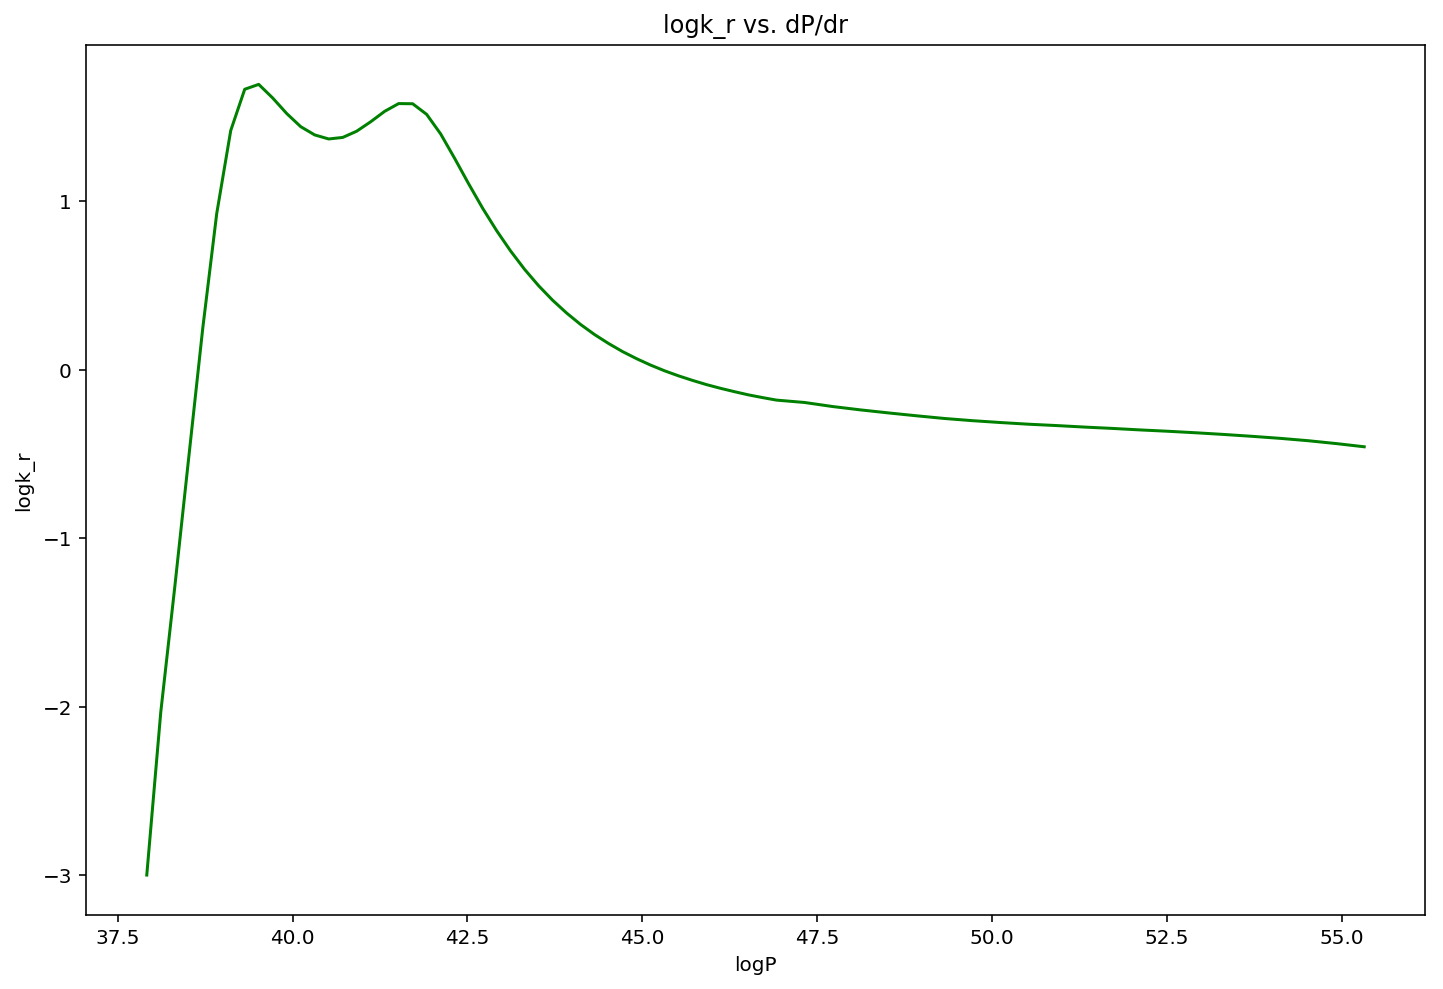

In [11]:
k = 1.38e-16
logk = np.log10(k)

m_h = 1.67e-24; logm_h = np.log10(1.67e-24)

def logP(logm,logT):
    logP = -logm_h + 4*logT + 15 + logk
    return logP

logP =  logP(logm_h,logT)

logk_r_logP = sp.interpolate.interp1d(logP,logk_r)

plt.figure(figsize=(12,8))
plt.subplot(111)
plt.plot(logP,logk_r_logP(logP),c='g')
plt.xlabel('logP')
plt.ylabel('logk_r')
plt.title('logk_r vs. dP/dr')
plt.show()

### 1.1 Extending the interpolator